In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from datetime import datetime,time
import pingouin as pg
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("D:/mentorness- ML intern/fraud detection/FastagFraudDetection.csv")

In [3]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [4]:
df.shape

(5000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [6]:
df.isna().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [7]:
rows=df[df['FastagID']=='NaN']

In [8]:
nan_rows = df[df['FastagID'].isna()]

In [9]:
nan_rows

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud
16,17,1/22/2023 16:45,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",62,KA20GH1345,Not Fraud
23,24,1/29/2023 3:05,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",77,KA77UV0123,Not Fraud
30,31,2/5/2023 13:20,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",57,KA92IJ5789,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4967,8/31/2023 6:08,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",47,AP34MN6789,Not Fraud
4973,4974,12/27/2023 19:04,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",84,AP01AB4567,Not Fraud
4980,4981,4/20/2023 6:01,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",74,AP78OP2345,Not Fraud
4987,4988,8/19/2023 18:57,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",90,AP45CD0123,Not Fraud


In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

Transaction_ID           5000
Timestamp                4423
Vehicle_Type                7
FastagID                 4451
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
dtype: int64

In [12]:
df.value_counts('Lane_Type')

Lane_Type
Regular    2858
Express    2142
Name: count, dtype: int64

In [13]:
df.value_counts('Vehicle_Type')

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
SUV           714
Sedan         714
Truck         714
Van           714
Name: count, dtype: int64

In [14]:
df.value_counts('TollBoothID')

TollBoothID
B-102    1432
A-101    1428
C-103    1426
D-106     570
D-105     104
D-104      40
Name: count, dtype: int64

In [15]:
df.value_counts('Vehicle_Dimensions')

Vehicle_Dimensions
Large     2144
Medium    1428
Small     1428
Name: count, dtype: int64

In [16]:
df.value_counts('Geographical_Location')

Geographical_Location
12.84197701525119, 77.67547528176169     1000
12.936687032945434, 77.53113977439017    1000
13.042660878688794, 77.47580097259879    1000
13.059816123454882, 77.77068662374292    1000
13.21331620748757, 77.55413526894684     1000
Name: count, dtype: int64

In [17]:
df.value_counts('Vehicle_Plate_Number')

Vehicle_Plate_Number
AP00WX5678    1
KA74QR4582    1
KA74UV2145    1
KA74UV0123    1
KA74UV0113    1
             ..
KA17KL2345    1
KA17KL2145    1
KA17KL0123    1
KA17IJ8991    1
WB34YZ6789    1
Name: count, Length: 5000, dtype: int64

In [18]:
df.value_counts('Fraud_indicator')

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64

In [19]:
df.value_counts('Fraud_indicator')[0]/df.shape[0]*100


80.34

In [20]:
df.select_dtypes(exclude='object').corr()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
Transaction_ID,1.000000,-0.023515,0.044433,0.014378
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229
Amount_paid,0.044433,0.870078,1.000000,0.039027
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000


In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['number']).columns

In [22]:
pip install pingouin


In [23]:
def calculate_eta_squared(df, categorical_col, numeric_col):
    aov = pg.anova(dv=numeric_col, between=categorical_col, data=df)
    eta_squared = aov['np2'][0]
    return eta_squared

# Function to interpret eta-squared value
def interpret_eta_squared(eta_squared):
    if eta_squared < 0.01:
        return "Very Weak"
    elif eta_squared < 0.06:
        return "Weak"
    elif eta_squared < 0.14:
        return "Medium"
    else:
        return "Strong"

# Calculate eta-squared for each numeric-categorical pair
eta_squared_results = {}

for cat_col in categorical_columns:
    for num_col in numeric_columns:
        eta_squared = calculate_eta_squared(df, cat_col, num_col)
        strength = interpret_eta_squared(eta_squared)
        eta_squared_results[f"{cat_col}-{num_col}"] = (eta_squared, strength)

# Print the results
print("Eta-Squared Results:")
for pair, (eta_squared, strength) in eta_squared_results.items():
    print(f"{pair}: {eta_squared} ({strength})")

Eta-Squared Results:
Timestamp-Transaction_ID: 0.9970769334190773 (Strong)
Timestamp-Transaction_Amount: 0.8572032506228845 (Strong)
Timestamp-Amount_paid: 0.8758196965350322 (Strong)
Timestamp-Vehicle_Speed: 0.8774587677590742 (Strong)
Vehicle_Type-Transaction_ID: 1.199520047980802e-06 (Very Weak)
Vehicle_Type-Transaction_Amount: 0.9736175733572155 (Strong)
Vehicle_Type-Amount_paid: 0.742692774326956 (Strong)
Vehicle_Type-Vehicle_Speed: 0.0003263414107587846 (Very Weak)
FastagID-Transaction_ID: 1.0 (Strong)
FastagID-Transaction_Amount: 1.0 (Strong)
FastagID-Amount_paid: 1.0 (Strong)
FastagID-Vehicle_Speed: 1.0 (Strong)
TollBoothID-Transaction_ID: 0.01740817983178461 (Weak)
TollBoothID-Transaction_Amount: 0.960517757363772 (Strong)
TollBoothID-Amount_paid: 0.7327548781645005 (Strong)
TollBoothID-Vehicle_Speed: 0.0016310900129184564 (Very Weak)
Lane_Type-Transaction_ID: 3.986012198962147e-08 (Very Weak)
Lane_Type-Transaction_Amount: 0.042578372290645476 (Weak)
Lane_Type-Amount_paid: 0.0

In [24]:
df['Timestamp'].min(),df['Timestamp'].max()

('1/1/2023 0:00', '9/9/2023 9:09')

In [25]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])


In [26]:
df['Date']=df['Timestamp'].dt.date

In [27]:
df['Date']=pd.to_datetime(df['Date'])


In [28]:
df['Day']=df['Date'].dt.dayofweek

In [29]:
df['Month']=df['Date'].dt.month

In [30]:
df['Time']=df['Timestamp'].dt.time

In [31]:
def time_dimension(t):
    if time(12,0)<=t<time(18,0):
        return 'noon'
    elif time(6,0)<=t<time(12,0):
        return 'morning'
    else:
        return 'night'
        

In [32]:
df['Part_of_day']=df['Time'].apply(time_dimension)

In [33]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Date,Day,Month,Time,Part_of_day
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,2023-01-06,4,1,11:20:00,morning
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,2023-01-07,5,1,14:55:00,noon
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,2023-01-08,6,1,18:25:00,night
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,2023-01-09,0,1,02:05:00,night
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,2023-01-10,1,1,06:35:00,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2023-01-01 22:18:00,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud,2023-01-01,6,1,22:18:00,night
4996,4997,2023-01-17 13:43:00,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud,2023-01-17,1,1,13:43:00,noon
4997,4998,2023-02-05 05:08:00,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud,2023-02-05,6,2,05:08:00,night
4998,4999,2023-02-20 20:34:00,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud,2023-02-20,0,2,20:34:00,night


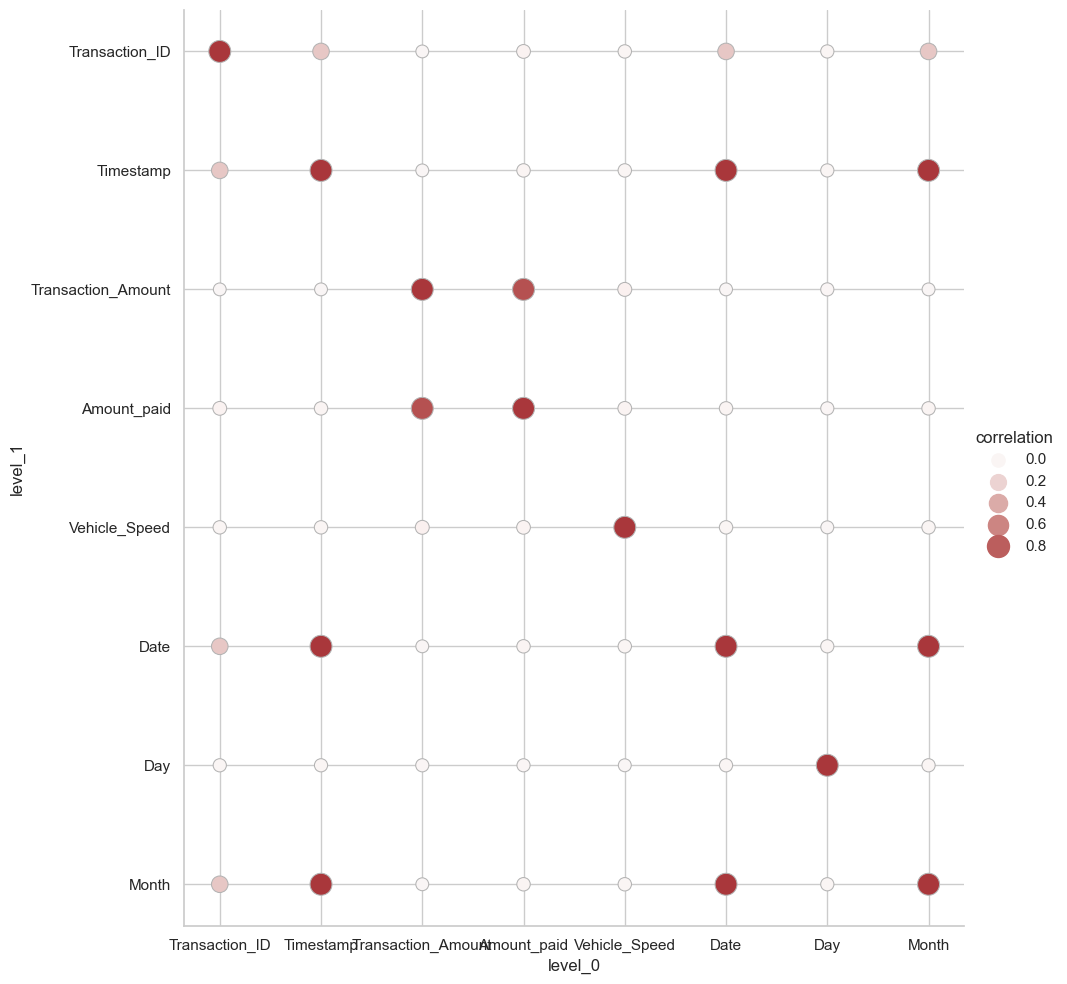

In [34]:
corr_mat = df.select_dtypes(exclude='object').corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8))

In [35]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Date,Day,Month,Time,Part_of_day
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,2023-01-06,4,1,11:20:00,morning
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,2023-01-07,5,1,14:55:00,noon
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,2023-01-08,6,1,18:25:00,night
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,2023-01-09,0,1,02:05:00,night
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,2023-01-10,1,1,06:35:00,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2023-01-01 22:18:00,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud,2023-01-01,6,1,22:18:00,night
4996,4997,2023-01-17 13:43:00,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud,2023-01-17,1,1,13:43:00,noon
4997,4998,2023-02-05 05:08:00,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud,2023-02-05,6,2,05:08:00,night
4998,4999,2023-02-20 20:34:00,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud,2023-02-20,0,2,20:34:00,night


(array([ 788.,  208., 1024., 1185.,  596.,  104.,    0.,    0.,  448.,
         647.]),
 array([  0.,  35.,  70., 105., 140., 175., 210., 245., 280., 315., 350.]),
 <BarContainer object of 10 artists>)

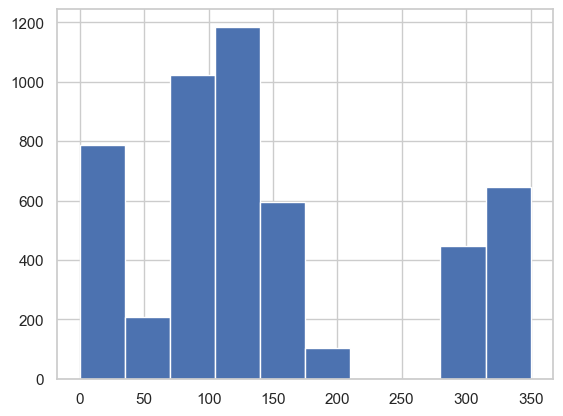

In [36]:
plt.hist(df['Amount_paid'])

(array([ 714.,  142.,  572., 1286.,  714.,  142.,    0.,    0.,  572.,
         858.]),
 array([  0.,  35.,  70., 105., 140., 175., 210., 245., 280., 315., 350.]),
 <BarContainer object of 10 artists>)

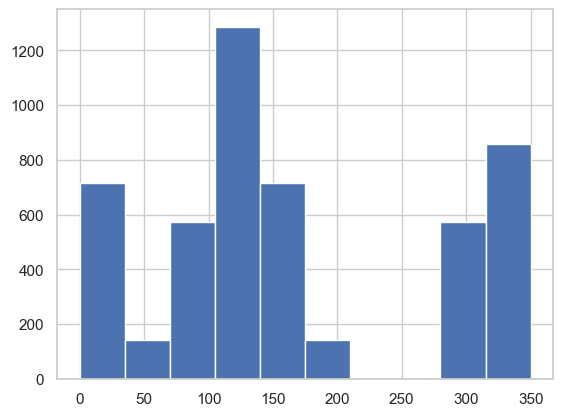

In [37]:
plt.hist(df['Transaction_Amount'])

(array([ 983.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4017.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

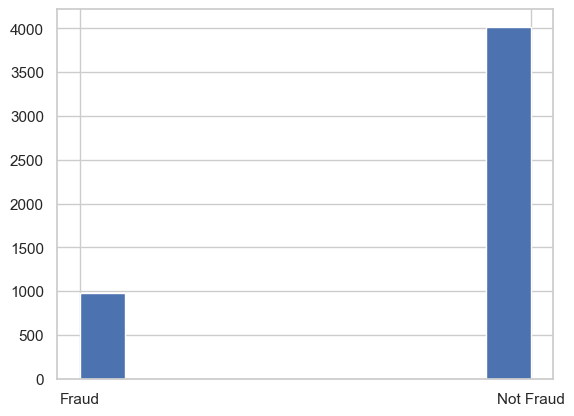

In [38]:
plt.hist(df['Fraud_indicator'])

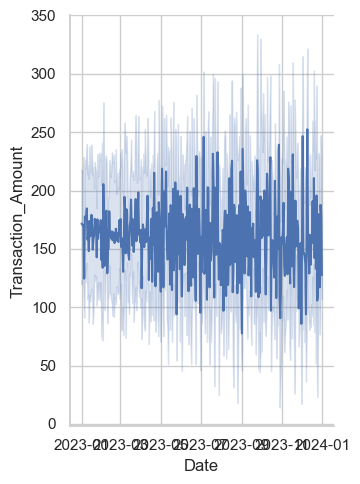

In [39]:
sns.relplot(
    data=df,
    x="Date", y="Transaction_Amount",
       kind="line", size_order=["T1", "T2"],
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

<Axes: xlabel='Transaction_Amount', ylabel='Amount_paid'>

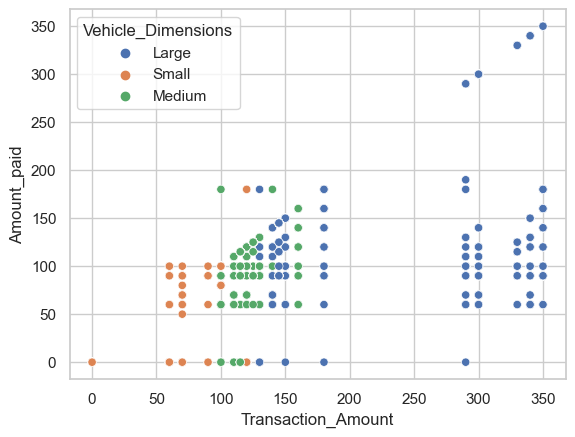

In [40]:
sns.scatterplot(data=df,x='Transaction_Amount', y='Amount_paid', hue="Vehicle_Dimensions")

<Axes: >

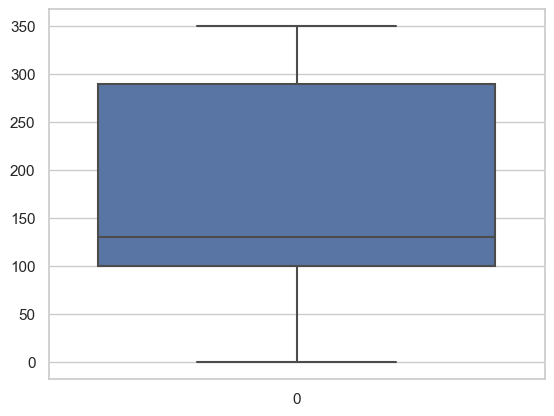

In [41]:
sns.boxplot(df['Transaction_Amount'])

In [42]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Date,Day,Month,Time,Part_of_day
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,2023-01-06,4,1,11:20:00,morning
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,2023-01-07,5,1,14:55:00,noon
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,2023-01-08,6,1,18:25:00,night
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,2023-01-09,0,1,02:05:00,night
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,2023-01-10,1,1,06:35:00,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2023-01-01 22:18:00,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud,2023-01-01,6,1,22:18:00,night
4996,4997,2023-01-17 13:43:00,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud,2023-01-17,1,1,13:43:00,noon
4997,4998,2023-02-05 05:08:00,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud,2023-02-05,6,2,05:08:00,night
4998,4999,2023-02-20 20:34:00,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud,2023-02-20,0,2,20:34:00,night


In [43]:
df.drop(['Transaction_ID','Timestamp','Vehicle_Plate_Number','Geographical_Location','Date','Time'],axis=1, inplace=True)

In [44]:
df

,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Day,Month,Part_of_day
0,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,65,Fraud,4,1,morning
1,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,78,Fraud,5,1,noon
2,Motorcycle,NaN,D-104,Regular,Small,0,0,53,Not Fraud,6,1,night
3,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,92,Fraud,0,1,night
4,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,60,Fraud,1,1,morning
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,81,Not Fraud,6,1,night
4996,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,64,Not Fraud,1,1,noon
4997,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,93,Not Fraud,6,2,night
4998,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,57,Not Fraud,0,2,night


In [45]:
def new(i):
    if i=='NaN':
        return 0
    else:
        return 1

In [46]:
df['Fastag_id']=df['FastagID'].apply(new)


In [47]:
df.drop(['FastagID'],axis=1, inplace=True)

In [48]:
label=LabelEncoder()
df['Fraud_indicator']=label.fit_transform(df['Fraud_indicator'])

In [49]:
ordinal=OrdinalEncoder()
df[['Vehicle_Dimensions','Part_of_day']]=ordinal.fit_transform(df[['Vehicle_Dimensions','Part_of_day']])

In [50]:
get_dummied = pd.get_dummies(df[['Vehicle_Type', 'TollBoothID', 'Lane_Type']], dtype=int,drop_first=True)

df = pd.concat([df, get_dummied], axis=1)

df.drop(['Vehicle_Type', 'TollBoothID', 'Lane_Type'], axis=1, inplace=True)



In [51]:
df

,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Day,Month,Part_of_day,Fastag_id,Vehicle_Type_Car,...,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_B-102,TollBoothID_C-103,TollBoothID_D-104,TollBoothID_D-105,TollBoothID_D-106,Lane_Type_Regular
0,0.0,350,120,65,0,4,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,120,100,78,0,5,1,2.0,1,1,...,0,0,0,0,1,0,0,0,0,1
2,2.0,0,0,53,1,6,1,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0.0,350,120,92,0,0,1,1.0,1,0,...,0,0,1,0,0,1,0,0,0,1
4,1.0,140,100,60,0,1,1,0.0,1,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,330,330,81,1,6,1,1.0,1,0,...,0,0,1,0,0,1,0,0,0,1
4996,1.0,125,125,64,1,1,1,2.0,1,0,...,0,0,0,1,1,0,0,0,0,0
4997,1.0,115,115,93,1,6,2,1.0,1,0,...,0,1,0,0,0,0,0,0,0,1
4998,0.0,145,145,57,1,0,2,1.0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [52]:
X=df.drop(['Fraud_indicator'],axis=1)
y=df['Fraud_indicator']

In [53]:
X_train_val, X_test,y_train_val,y_test=train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val,y_train,y_val=train_test_split(X_train_val,y_train_val, test_size=0.25, random_state=42,stratify=y_train_val)

In [54]:
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [55]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [56]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train_resampled, y_train_resampled)

y_pred_val = model1.predict(X_val)
print(classification_report(y_val, y_pred_val))
print('roc_auc_score_rndm', round(roc_auc_score(y_val, y_pred_val),2))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       197
           1       0.98      1.00      0.99       803

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000

roc_auc_score_rndm 0.97


In [57]:
y_pred = model1.predict(X_test)
print(classification_report(y_test, y_pred))
print('roc_auc_score_rndm', round(roc_auc_score(y_test, y_pred),2))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       197
           1       0.98      1.00      0.99       803

    accuracy                           0.98      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.98      0.98      0.98      1000

roc_auc_score_rndm 0.96


In [58]:
accuracies_rndm = cross_val_score(estimator = model1, X = X_train_resampled, y = y_train_resampled, cv = 10)
print(accuracies_rndm)
print('Mean accuracy CV:',accuracies_rndm.mean())
print('Standard deviation of CV:',accuracies_rndm.std())

[0.98757764 0.97308489 0.98962656 0.99585062 1.         0.99792531
 1.         0.99792531 0.99792531 1.        ]
Mean accuracy CV: 0.9939915637913112
Standard deviation of CV: 0.008096073168053624


In [59]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [60]:
grid_search_rndm = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rndm.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [61]:
print('Best parameters:', grid_search_rndm.best_params_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [62]:
best_model_random = grid_search_rndm.best_estimator_

In [63]:
y_pred_val = best_model_random.predict(X_val)
print(classification_report(y_val, y_pred_val))
print('roc_auc_score_rndm', round(roc_auc_score(y_val, y_pred_val), 2))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       197
           1       0.98      1.00      0.99       803

    accuracy                           0.98      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.98      0.98      0.98      1000

roc_auc_score_rndm 0.96


In [64]:
y_pred = best_model_random.predict(X_test)
print(classification_report(y_test, y_pred))
print('roc_auc_score_rndm', round(roc_auc_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       197
           1       0.98      1.00      0.99       803

    accuracy                           0.98      1000
   macro avg       0.99      0.95      0.97      1000
weighted avg       0.98      0.98      0.98      1000

roc_auc_score_rndm 0.95


In [65]:
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train_resampled, y_train_resampled)

y_pred2_val = model2.predict(X_val)
print(classification_report(y_val, y_pred2_val))
print('roc_auc_score_dec', round(roc_auc_score(y_val, y_pred2_val),2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       197
           1       0.99      1.00      1.00       803

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.99      1000
weighted avg       0.99      0.99      0.99      1000

roc_auc_score_dec 0.98


In [66]:
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

print('roc_auc_score_dec', round(roc_auc_score(y_test, y_pred2),2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       197
           1       1.00      1.00      1.00       803

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

roc_auc_score_dec 0.99


In [67]:
accuracies_dec = cross_val_score(estimator = model2, X = X_train_resampled, y = y_train_resampled, cv = 10)
print(accuracies_dec)
print('Mean accuracy CV:',accuracies_dec.mean())
print('Standard deviation of CV:',accuracies_dec.std())

[0.99792961 0.99585921 0.98962656 1.         1.         0.99792531
 0.99792531 0.99792531 1.         0.99377593]
Mean accuracy CV: 0.9970967243112291
Standard deviation of CV: 0.0031048814742986046


In [68]:
param = { 'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [69]:
grid_search_dec = GridSearchCV(estimator=model2, param_grid=param,
                               cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dec.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [70]:
print('Best parameters:', grid_search_dec.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [71]:
best_model_dec = grid_search_dec.best_estimator_

In [72]:
y_pred2_val = best_model_dec.predict(X_val)
print(classification_report(y_val, y_pred2_val))
print('roc_auc_score_dec', round(roc_auc_score(y_val, y_pred2_val), 2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       197
           1       0.99      1.00      1.00       803

    accuracy                           0.99      1000
   macro avg       1.00      0.98      0.99      1000
weighted avg       0.99      0.99      0.99      1000

roc_auc_score_dec 0.98


In [73]:
y_pred2 = best_model_dec.predict(X_test)
print(classification_report(y_test, y_pred2))
print('roc_auc_score_dec', round(roc_auc_score(y_test, y_pred2), 2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       197
           1       1.00      1.00      1.00       803

    accuracy                           1.00      1000
   macro avg       1.00      0.99      1.00      1000
weighted avg       1.00      1.00      1.00      1000

roc_auc_score_dec 0.99


In [74]:
import joblib
joblib.dump(best_model_dec,"Decisiontree.pkl")

['Decisiontree.pkl']

In [75]:
loaded_model = joblib.load("Decisiontree.pkl")

In [76]:
loaded_model

DecisionTreeClassifier(max_depth=20, min_samples_split=10, random_state=42)

In [77]:
!pip install FastAPI

In [78]:
!pip install uvicorn

In [79]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import uvicorn
import nest_asyncio
import threading
from threading import Thread

In [80]:
class PredictionRequest(BaseModel):
    data: list
    

model = joblib.load("Decisiontree.pkl")
app=FastAPI()

@app.get("/")
def read_root():
    return {"message": "Welcome to the Decision Tree Classification Model API"}


@app.post("/predict/")
def predict(request: PredictionRequest):
    data = [[list]]
    prediction = model.predict(data)[0]
    return {"prediction": prediction.tolist()}

In [84]:
def run():
    uvicorn.run(app, host='127.0.0.1', port=8006)


server_thread = Thread(target=run)
server_thread.start()

INFO:     Started server process [31080]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8006 (Press CTRL+C to quit)
